In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ejercicio 1

In [104]:
datos_entrenamiento_csv = pd.read_csv('mnist_train.csv', header=None)
datos_entrenamiento = datos_entrenamiento_csv.values.tolist()

datos_testeo_csv = pd.read_csv('mnist_test.csv', header=None)
datos_testeo = datos_testeo_csv.values.tolist()


#### Inciso A

In [105]:
def vector_a_matriz(vector): # matriz 28x28
    matriz = []
    fila = []

    for i in range(0, 28):
        for j in range(0, 28):
            fila.append(int(vector[i*28+j]))
        matriz.append(fila)
        fila = []
        
    return np.array(matriz)


def remover_indice_vector(vector):
    indice_del_vector = vector[0] 
    # Guardar matriz vectorizada sin el indice (primer elemento)
    vector_sin_indice = vector[1:]

    return indice_del_vector, vector_sin_indice

def grafico_matriz(matriz, indice):
    plt.imshow(matriz, cmap='gray')
    plt.title(indice)
    plt.show()


def graficar_imagen(datos, fila):
    # Guardar la matriz vectorizada
    vector = datos[fila]
    
    indice_del_vector, vector_sin_indice = remover_indice_vector(vector)
    
    matriz = vector_a_matriz(vector_sin_indice)

    grafico_matriz(matriz, indice_del_vector)



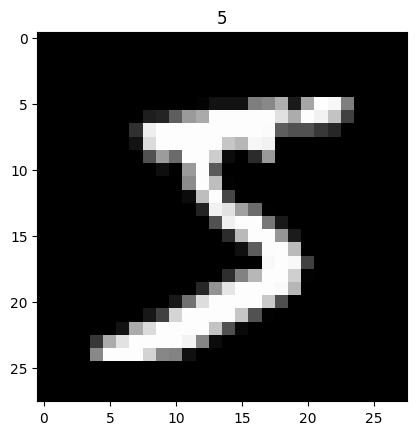

In [106]:
graficar_imagen(datos_entrenamiento, 0)

#### Inciso B

In [107]:
def cantidad_indices(datos, cantidad):
    indices = []
    suma = 0
    
    for i in range(0, cantidad):
        indices.append(int(datos[i][0]))
    
    for j in range(0, 10):
        print("Hay", indices.count(j), "imagenes del digito", j)
        suma = suma + indices.count(j)

    

In [108]:
cantidad_indices(datos_entrenamiento, len(datos_entrenamiento))

Hay 5923 imagenes del digito 0
Hay 6742 imagenes del digito 1
Hay 5958 imagenes del digito 2
Hay 6131 imagenes del digito 3
Hay 5842 imagenes del digito 4
Hay 5421 imagenes del digito 5
Hay 5918 imagenes del digito 6
Hay 6265 imagenes del digito 7
Hay 5851 imagenes del digito 8
Hay 5949 imagenes del digito 9


In [109]:
cantidad_indices(datos_testeo, len(datos_testeo))

Hay 980 imagenes del digito 0
Hay 1135 imagenes del digito 1
Hay 1032 imagenes del digito 2
Hay 1010 imagenes del digito 3
Hay 982 imagenes del digito 4
Hay 892 imagenes del digito 5
Hay 958 imagenes del digito 6
Hay 1028 imagenes del digito 7
Hay 974 imagenes del digito 8
Hay 1009 imagenes del digito 9


#### Inciso C

In [110]:
# def promedio_2000_imagenes(datos):
#     suma = np.zeros((28,28))

#     for i in range(0, 2000):
#        _, vector_sin_indice = remover_indice_vector(datos[i])
#        suma = suma + vector_a_matriz(vector_sin_indice)

#     promedio = suma / 2000

#     return promedio

def imagen_promedio_de_digito(datos, cantidad_imagenes, digito):
   
   imagen_promedio = np.zeros((28,28))

   cantidad_imagenes_contadas = 0

   for i in range(0, cantidad_imagenes):
      if datos[i][0] == digito:
         _ , vector_sin_indice = remover_indice_vector(datos[i])
         imagen_promedio = imagen_promedio + vector_a_matriz(vector_sin_indice)
         cantidad_imagenes_contadas += 1
   
   imagen_promedio = imagen_promedio / cantidad_imagenes_contadas
   
   return imagen_promedio

def imagenes_promedio_de_digitos(datos, cantidad_imagenes):

   imagenes_promedio = []

   for i in range(0, 10):
      imagenes_promedio.append( imagen_promedio_de_digito(datos, cantidad_imagenes, i) )

   return imagenes_promedio
   


#### Inciso D

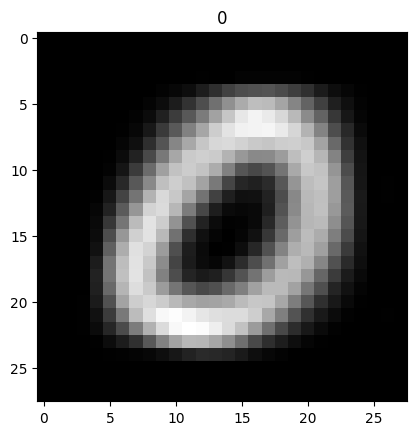

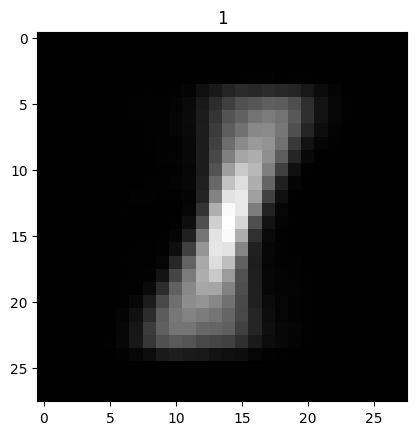

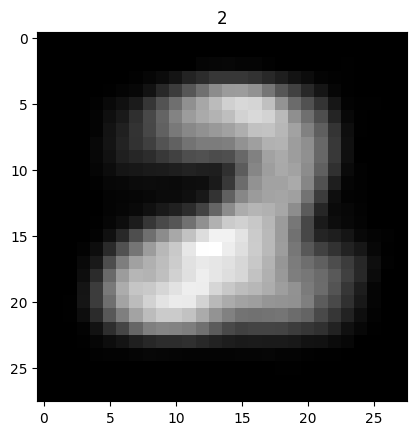

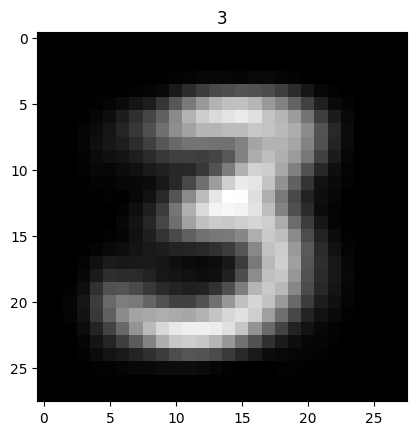

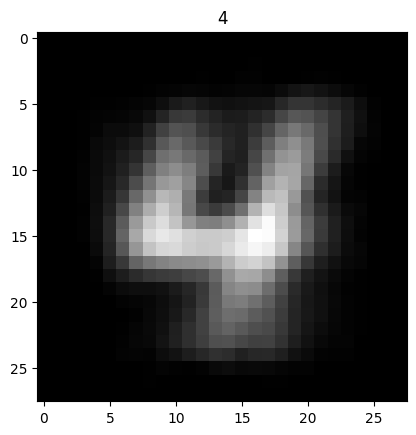

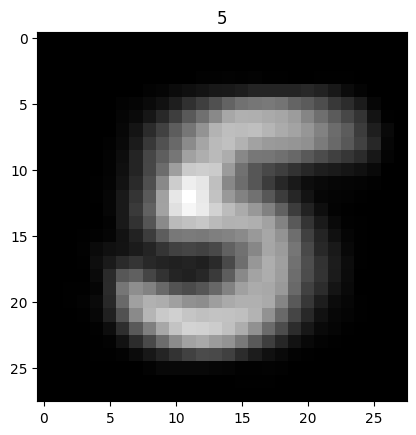

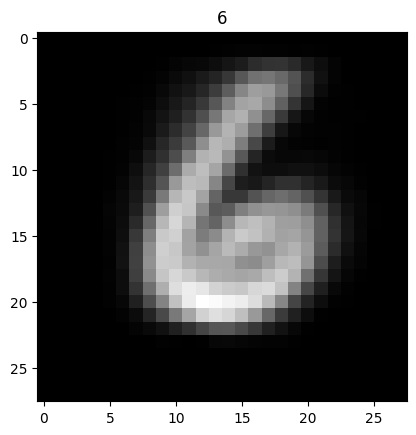

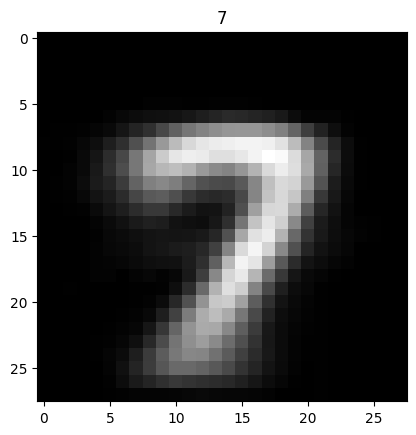

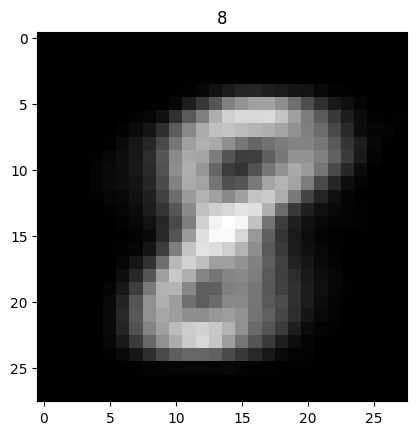

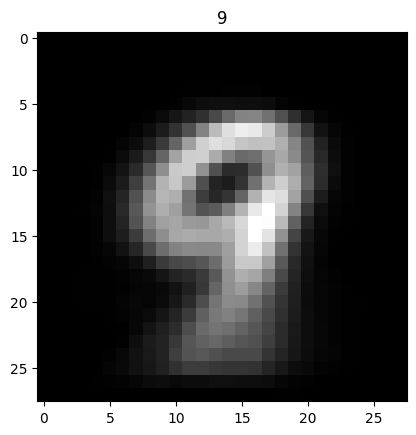

In [111]:
imagenes_promedio = imagenes_promedio_de_digitos(datos_entrenamiento, 2000)

for i in range(0, 10):
    grafico_matriz(imagenes_promedio[i], i)

### Ejercicio 2

#### Inciso A

In [112]:
#Agarramos una cantidad de filas de 
def filas_a_imagenes(datos, cantidad):
    
    imagenes = []
    indices = []

    for i in range(0, cantidad):
        indice_del_vector, vector_sin_indice = remover_indice_vector( datos[i] )
        matriz = vector_a_matriz( vector_sin_indice )
        imagenes.append( matriz )
        indices.append( indice_del_vector )

    return imagenes, indices


In [113]:
imagenes_de_testeo, indices_imagenes_de_testeo = filas_a_imagenes(datos_testeo, 200)

In [114]:
def predicciones(imagenes_promedio, imagenes_de_testeo):

    distancias = []
    distancia = 0
    predicciones = [] 

    for i in range(0, len(imagenes_de_testeo)):
        for j in range(0, 10): 
            distancia = np.linalg.norm( imagenes_promedio[j] - imagenes_de_testeo[i] )
            distancias.append( distancia )
        
        prediccion = distancias.index( min(distancias) )
        predicciones.append( prediccion )
        distancias.clear()

    return predicciones

In [115]:
predicciones = predicciones(imagenes_promedio, imagenes_de_testeo)

def precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones):

    precision = 0

    desaciertos = []
    
    for i in range(0,200):
        if indices_imagenes_de_testeo[i] == predicciones[i]:
            precision += 1
        else: 
            
            desaciertos.append( (imagenes_de_testeo[i], indices_imagenes_de_testeo[i] , predicciones[i]) )


    precision = precision / len(predicciones)

    return desaciertos, precision


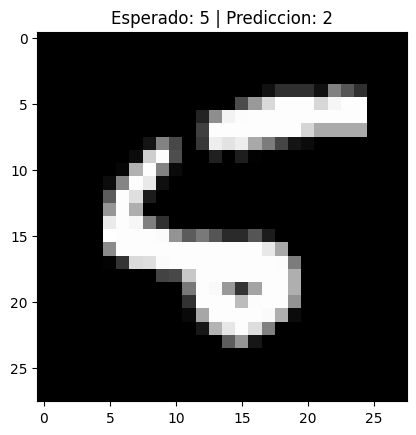

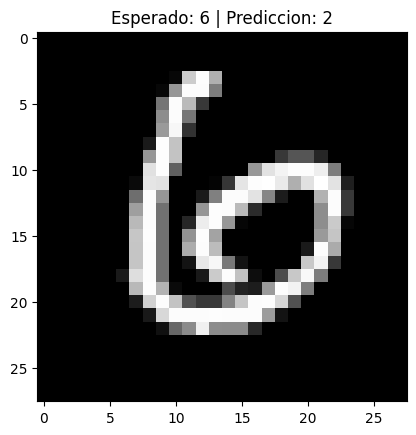

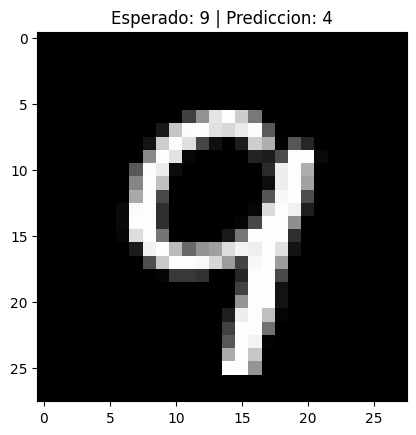

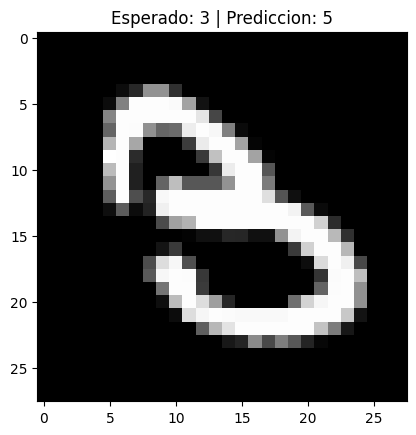

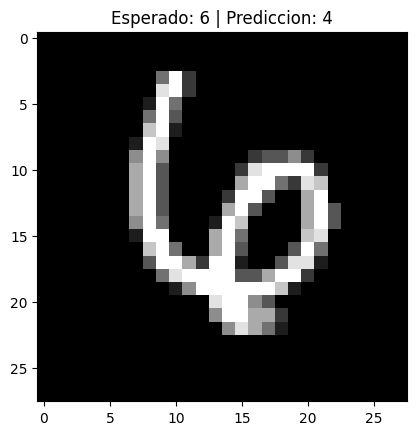

In [116]:
desaciertos, precision = precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones)
for i in range(0, 5):
    indice = desaciertos[i][1]
    prediccion = desaciertos[i][2]
    plt.title("Esperado: {} | Prediccion: {}".format(indice, prediccion))
    plt.imshow(desaciertos[i][0], cmap='gray')
    plt.show()
    

¿Considera buena la precision?

Consideramos que la precision es buena para solo considerar la distancia euclidea entre las imagenes, puesto que para la mayoria de los casos acerto (77%) y en los casos que desacertó alguno de los digitos transcriptos no se reconocen con facilidad y otros son muy parecidos a otros numeros.


### Ejercicio 3

In [117]:
e = 10**(-15)

def metodo_potencia_SVD(matriz):

    m, n = np.shape(matriz)

    A = matriz
    B = np.transpose(A) @ A

    x = np.random.rand(n, 1)
    norma_x = np.linalg.norm(x)
    x = x / norma_x

    Bx = B @ x
    norma_Bx = np.linalg.norm(Bx)
    x_k = Bx/norma_Bx

    while (np.transpose(x_k) @ x) < (1 - e):

        x = x_k
        Bx = B @ x
        norma_Bx = np.linalg.norm(Bx)
        x_k = Bx/norma_Bx

    v = x_k
    sigma = np.linalg.norm(A@v)
    u = (A@v) / sigma

    return sigma, v, u

def descomposicion_SVD(matriz):

    m, n = np.shape(matriz)

    A = matriz
    U_t = []
    Z = np.zeros((m,n))
    V_t = []

    for i in range(0, m):

        sigma, v, u = metodo_potencia_SVD(A)

        if i < n:
            Z[i][i] = sigma
            V_t.append(np.transpose(v)[0])
        
        U_t.append(np.transpose(u)[0])

        A = A - ( sigma * ( u@np.transpose(v) ) )

    U = np.transpose(np.array(U_t))
    V = np.transpose(np.array(V_t))

    return U, Z, V

In [118]:
_, vector_A = remover_indice_vector(datos_entrenamiento[0])
A = vector_a_matriz(vector_A)

U, Z, V = descomposicion_SVD(A)

A_SVD = U@Z@np.transpose(V) 

np.linalg.norm(A - A_SVD) 

5.51975839625315e-13

### Ejercicio 4

#### Inciso A

In [119]:
M = []

for i in range(10):
    M_i = []
    for j in range(2000):
        indice_vector_i, vector = remover_indice_vector(datos_testeo[j]) 
        if indice_vector_i == i:
            M_i.append(vector)
    M_i = np.transpose(np.array(M_i))
    M.append( M_i )

#### Inciso B

In [120]:
U = []
Σ = []
V = []

# for i in range(10):
#     U_i, Σ_i, V_i = descomposicion_SVD(M[i])
#     U.append(U_i)
#     Σ.append(Σ_i)
#     V.append(V_i)

U_i, Σ_i, V_i = descomposicion_SVD(M[1])
U.append(U_i)
Σ.append(Σ_i)
V.append(V_i)

In [124]:
M_aprox = (U_i@Σ_i@np.transpose(V_i) )
print( np.linalg.norm(M[1] - M_aprox) )

1.3169930183673796e-11


#### Inciso C

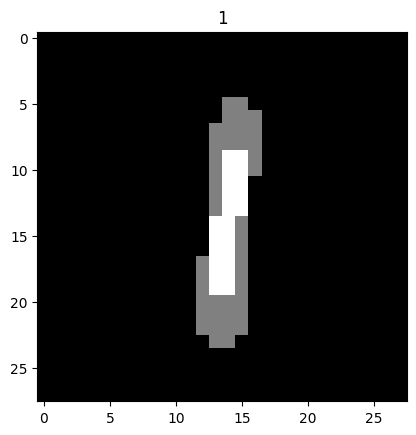

In [163]:
U_t = np.transpose(U_i) * 15

primer_columna = U_t[0].tolist()

matriz = vector_a_matriz(primer_columna)

grafico_matriz(matriz, 1)

Las columnas de U_i son combinacion lineal del espacio columna de M_i, y como las columnas de M_i son nuestras imagenes, las imagenes forman las columnas de U_i. Entonces estamos graficando una combinacion lineal de las todas imagenes de aquel digito

#### Inciso D

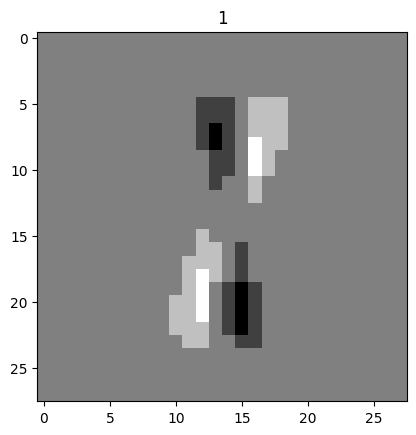

In [164]:
U_t = np.transpose(U_i) * 15

primer_columna = U_t[1].tolist()

matriz = vector_a_matriz(primer_columna)

grafico_matriz(matriz, 1)

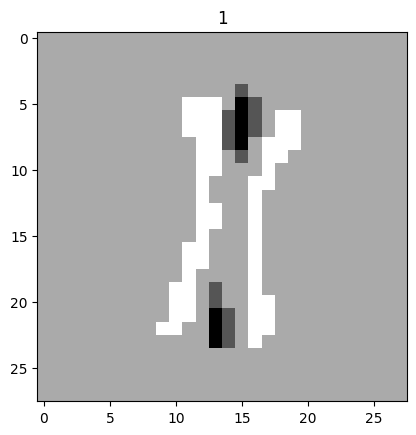

In [165]:
U_t = np.transpose(U_i) * 15

primer_columna = U_t[2].tolist()

matriz = vector_a_matriz(primer_columna)

grafico_matriz(matriz, 1)

Observamos que las 3 imagenes "mantienen" el mismo aspecto de un rectangulo y que estan centradas. 
Como sabemos que cada columna de U_i es combinacion lineal del las imagenes, entonces tiene sentido que éstas esten centradas y se parezcan al digito 1. Podemos notar tambien que los pixeles tienen cierto rango similar al imagen promedio de cada digito
 